In [1]:
%cd ../

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.tardb as tardb
import htfa_torch.utils as utils

import nilearn.plotting as niplot
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
spreng_db = tardb.FmriTarDataset('data/mini_aging_site1.tar')

In [6]:
dtfa = DTFA.DeepTFA(spreng_db, num_factors=100, embedding_dim=2)

In [7]:
dtfa.num_blocks

14

In [8]:
dtfa.num_voxels

142880

In [9]:
dtfa.load_state('sub-CHECK_09192023_220232_Epoch2000')

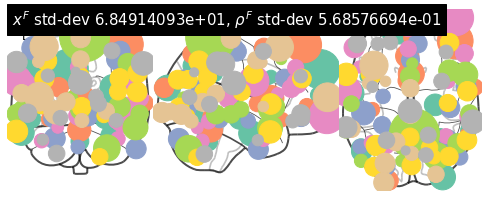

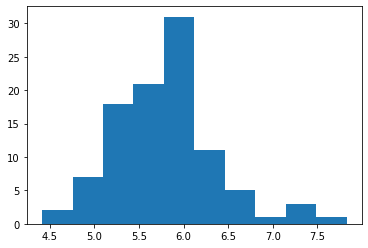

(<nilearn.plotting.displays.OrthoProjector at 0x7fe1f42206a0>,
 tensor([[-8.3827e-02, -2.6027e+01,  1.0346e+01],
         [ 3.4360e+01, -9.7192e+01,  1.9141e+01],
         [ 2.6510e+01, -2.1278e+01, -1.2919e+01],
         [-5.1495e+01, -6.6886e+01, -1.3835e+01],
         [-1.2162e+01,  6.3455e+01,  3.8783e+01],
         [ 6.1540e+01, -4.7758e+01,  3.4031e+01],
         [ 4.7670e+01,  1.1551e+01,  3.0926e+01],
         [-5.0785e+01, -7.0216e+01,  4.2385e+01],
         [ 2.9170e+01,  6.1701e+01,  1.1687e+01],
         [-6.1676e+01, -9.1859e+00, -2.8627e+01],
         [-3.0225e-01, -5.4057e+01, -3.7627e+01],
         [-4.6702e+01,  8.6531e+00,  2.8482e+01],
         [ 3.1598e+01, -5.6095e+01, -3.1381e+01],
         [-3.9382e+01, -2.6208e+01,  1.3023e+01],
         [-3.0355e+00,  3.0139e+01,  7.7000e+01],
         [ 1.7092e+00, -7.1424e+01,  5.4842e+01],
         [ 4.7578e+01,  4.5971e+01,  6.4375e+01],
         [-9.5264e-01, -5.1689e+01, -2.5596e+01],
         [ 6.8308e+01, -2.7673e+00,  

In [10]:
dtfa.visualize_factor_embedding()

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


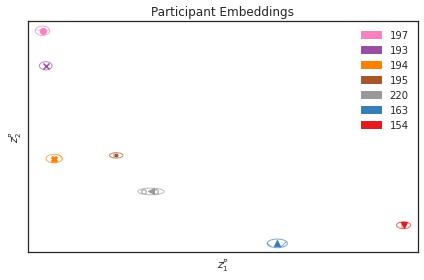

In [11]:
dtfa.scatter_subject_weight_embedding(figsize=None, colormap='Set1',
                            filename='spreng_subject_embedding.pdf')

09/20/2023 10:01:30 Plotting factors for Participant 197, run 0


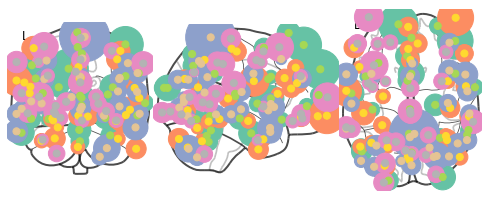

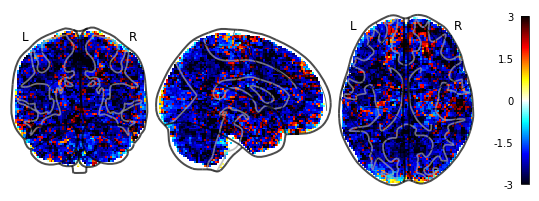

09/20/2023 10:02:15 Reconstruction Error (Frobenius Norm): 3.51481628e+02 out of 4.38154602e+02


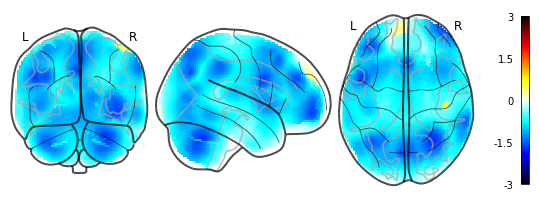

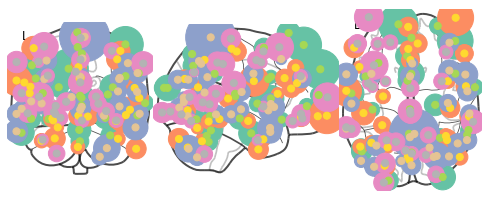

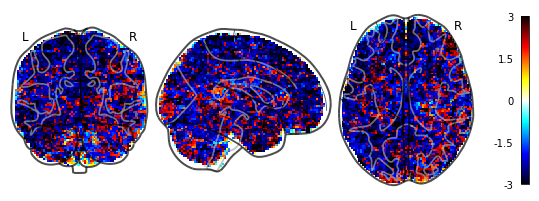

09/20/2023 10:03:02 Reconstruction Error (Frobenius Norm): 3.77908356e+02 out of 4.05010681e+02


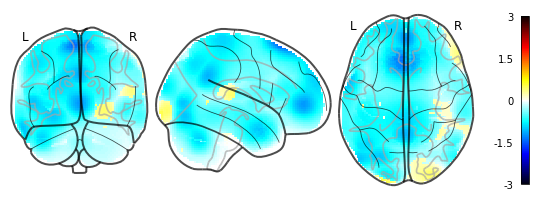

In [12]:
subject_runs = spreng_db.subject_runs()

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in spreng_db.blocks.values() if block['subject'] == subject and block['run'] == run]
    blocks.sort(key=lambda b: b['times'][0])
    for block in blocks:
        index = block['id']
        dtfa.plot_factor_centers(index,)
        dtfa.plot_original_brain(index,)
        dtfa.plot_reconstruction(index,)

In [13]:
def subject_labeler(subject):
    return 'Subject %d' % subject

def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._dataset.blocks.items():
        if subject_labeler(b[1]['subject']) == subject_label:
            yield b
            
def subject_weights(subject_label, subject_labeler=subject_labeler):
    for (b, W) in enumerate(dtfa.variational.hyperparams.state_vardict()['weights__mu']):
        if subject_labeler(dtfa._dataset.blocks[b]['subject']) == subject_label:
            yield W

def subject_age_group(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b[1]['individual_differences']['agegroup']:
            yield b[1]['individual_differences']['agegroup']
            
def subject_agegroup_labeler(subject):
    subject_group = [group for group in subject_age_group(subject, lambda s: s)]
    result = np.unique(subject_group)[0]
    return result

In [14]:
def subject_sex_group(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b[1]['individual_differences']['sex']:
            yield b[1]['individual_differences']['sex']
            
def subject_sex_labeler(subject):
    subject_group = [group for group in subject_sex_group(subject, lambda s: s)]
    result = np.unique(subject_group)[0]
    return result

In [15]:
def subject_age(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b[1]['individual_differences']['age']:
            yield b[1]['individual_differences']['age']
            
def subject_age_labeler(subject):
    subject_group = [group for group in subject_age(subject, lambda s: s)]
    result = np.unique(subject_group)[0]
    return result

In [16]:
def subject_education(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b[1]['individual_differences']['education']:
            yield b[1]['individual_differences']['education']
            
def subject_education_labeler(subject):
    subject_group = [group for group in subject_education(subject, lambda s: s)]
    result = np.unique(subject_group)[0]
    return result

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


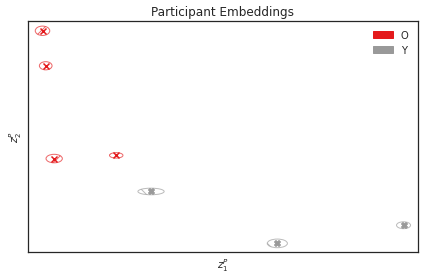

In [17]:
dtfa.scatter_subject_weight_embedding(labeler=subject_agegroup_labeler, figsize=None, colormap='Set1',
                            filename='spreng_subject_embedding_label.pdf')

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


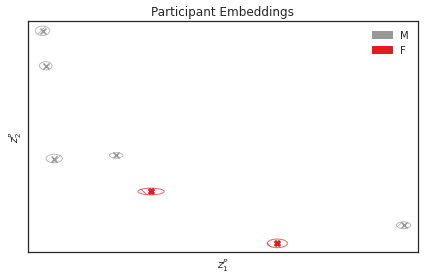

In [18]:
dtfa.scatter_subject_weight_embedding(labeler=subject_sex_labeler, figsize=None, colormap='Set1',
                            filename='spreng_subject_embedding_label_sex.pdf')

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


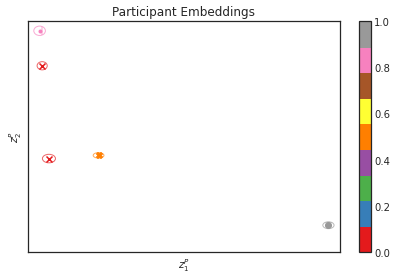

In [19]:
dtfa.scatter_subject_weight_embedding(labeler=subject_education_labeler, figsize=None, colormap='Set1',
                            filename='spreng_subject_embedding_label_education.pdf')

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


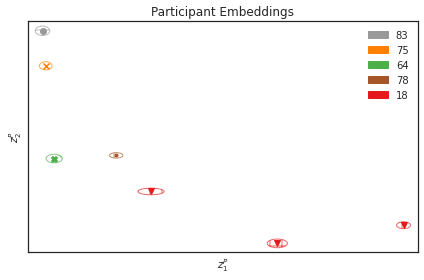

In [20]:
dtfa.scatter_subject_weight_embedding(labeler=subject_age_labeler, figsize=None, colormap='Set1',
                            filename='spreng_subject_embedding_label_age.pdf')

In [21]:
all_subject_weight_blocks = {key:None for key in dtfa._subjects}
all_subject_correlations = {key: None for key in dtfa._subjects}
all_subject_mean_correlations = {key: None for key in dtfa._subjects}
all_sujbect_std_correlations = {key: None for key in dtfa._subjects}

for s in dtfa._subjects:
    print ("Processing Subject " + str(s))
    all_subject_weight_blocks[s] = [weights for weights in subject_weights(s, lambda x: x)]
    all_subject_correlations[s] = np.array([utils.get_correlation_matrix(weights.T.data.numpy(), 
                                                         weights.T.data.numpy()) 
                                            for weights in all_subject_weight_blocks[s]])
    all_subject_mean_correlations[s] = all_subject_correlations[s].mean(axis=0)
    all_sujbect_std_correlations[s] = all_subject_correlations[s].std(axis=0)

Processing Subject 193
Processing Subject 194
Processing Subject 195
Processing Subject 197
Processing Subject 154
Processing Subject 163
Processing Subject 220


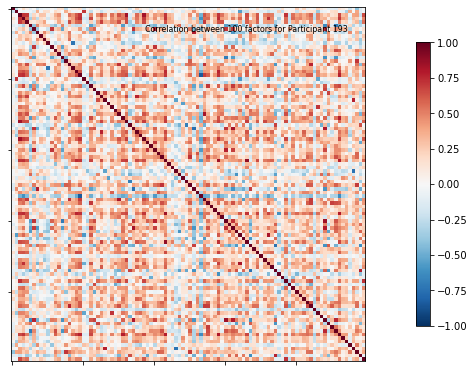

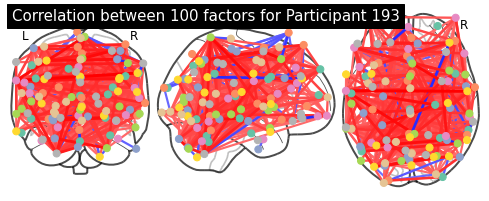

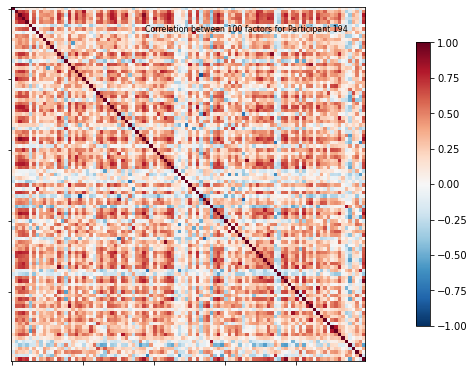

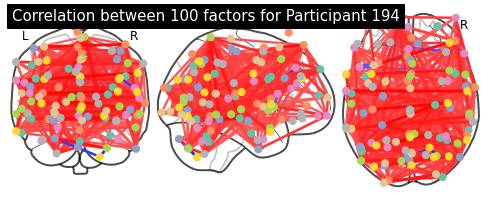

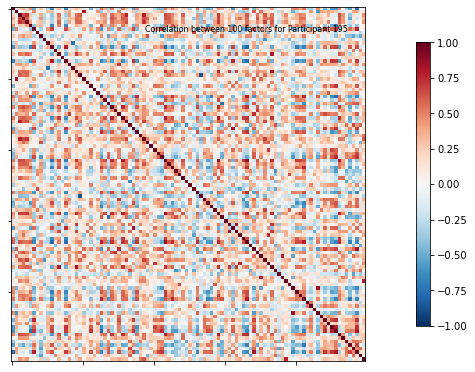

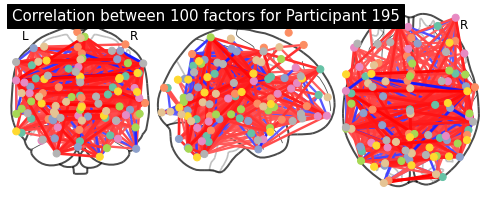

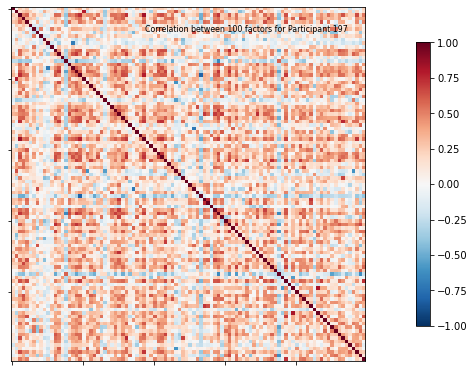

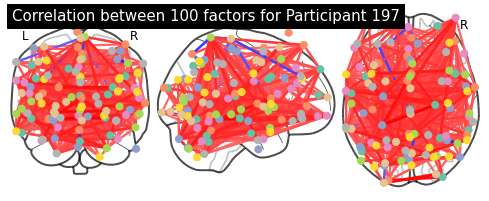

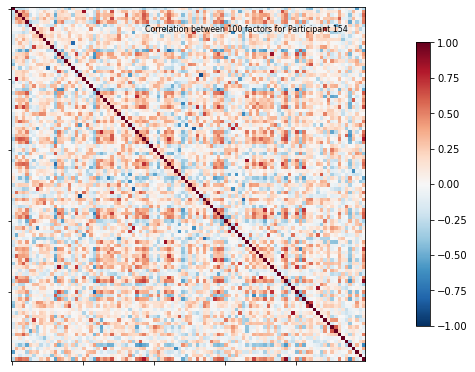

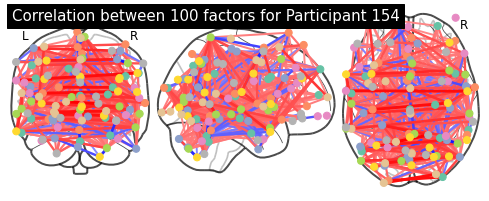

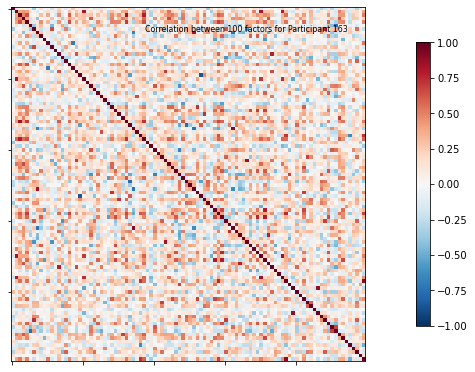

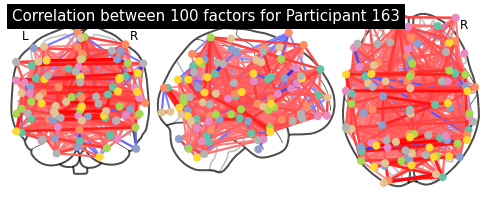

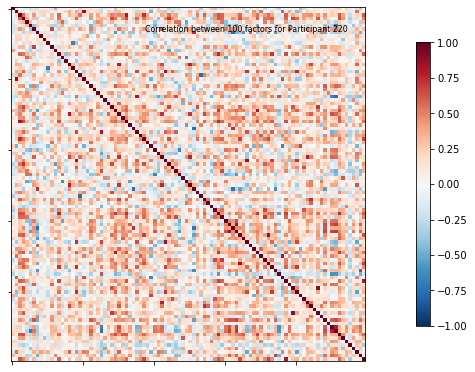

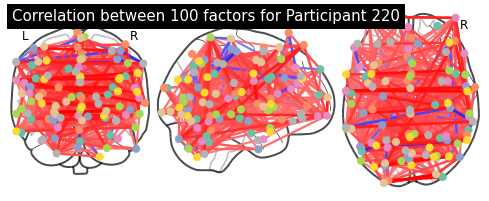

In [22]:
all_factor_centers = dtfa.variational.hyperparams.state_vardict()['template_factor_centers__mu'].data.numpy()
for s in dtfa._subjects:
    title = f"Correlation between {int(dtfa.num_factors)} factors for Participant {s}"

    # First plot the matrix
    display = niplot.plot_matrix(
        all_subject_mean_correlations[s], vmax=1, vmin=-1, colorbar=True, title=title
    )


    niplot.plot_connectome(
        all_subject_mean_correlations[s], all_factor_centers, edge_threshold="90%", title=title
    )

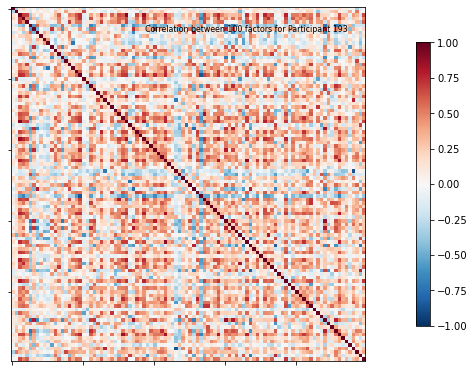

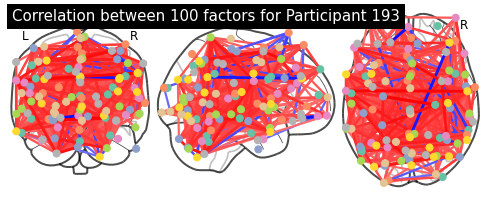

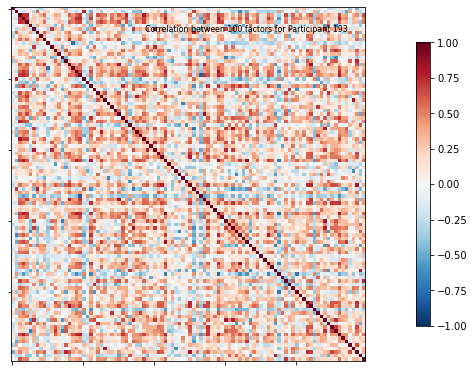

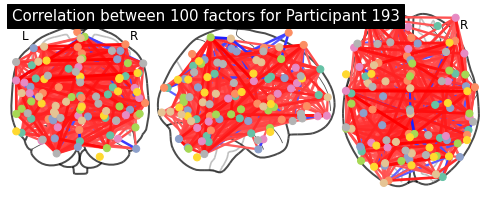

In [23]:
s = 193
for subject_corrs in all_subject_correlations[s]:
    title = f"Correlation between {int(dtfa.num_factors)} factors for Participant {s}"

    # First plot the matrix
    display = niplot.plot_matrix(
        subject_corrs, vmax=1, vmin=-1, colorbar=True, title=title
    )


    niplot.plot_connectome(
        subject_corrs, all_factor_centers, edge_threshold="90%", title=title
    )

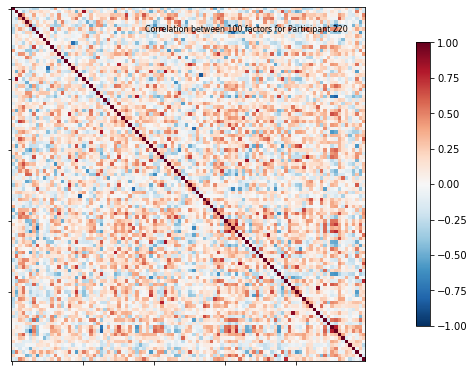

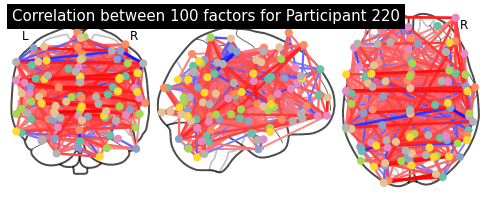

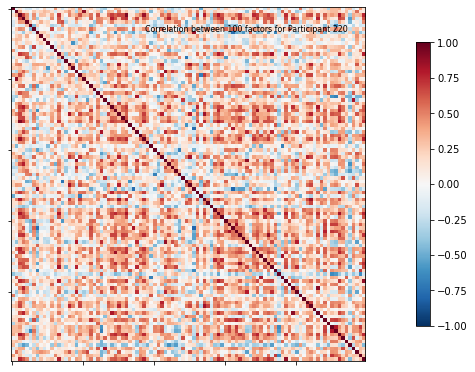

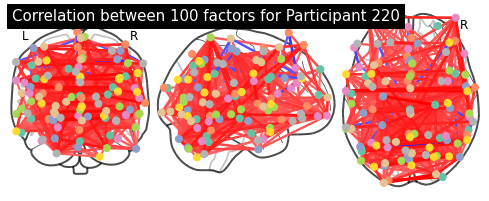

In [24]:
s = 220
for subject_corrs in all_subject_correlations[s]:
    title = f"Correlation between {int(dtfa.num_factors)} factors for Participant {s}"

    # First plot the matrix
    display = niplot.plot_matrix(
        subject_corrs, vmax=1, vmin=-1, colorbar=True, title=title
    )


    niplot.plot_connectome(
        subject_corrs, all_factor_centers, edge_threshold="90%", title=title
    )

In [25]:
all_factor_centers.min(axis=0)

array([ -67.393364, -103.41571 ,  -53.85506 ], dtype=float32)

In [26]:
all_factor_centers.max(axis=0)

array([68.307655, 71.24661 , 77.26896 ], dtype=float32)

In [30]:
dtfa.voxel_locations.min(dim=0)

torch.return_types.min(
values=tensor([ -68., -104.,  -66.]),
indices=tensor([    0, 44340, 67467]))

In [31]:
dtfa.voxel_locations.max(dim=0)

torch.return_types.max(
values=tensor([70., 72., 78.]),
indices=tensor([142743,  82656,  49935]))